In [3]:
filename = 'foobar.txt'
basename, __, ext = filename.rpartition('.')
print basename
print ext

foobar
txt


In [11]:
faces = ['1'] * 5
for i, le in enumerate(faces):
    print i, le

0 1
1 1
2 1
3 1
4 1


In [13]:
letters = ['s', 'p', 'a', 'm']
word = ''.join(letters)
print word

spam


In [18]:
a = [3, 4, 5,6,7]
b = [i for i in a if i > 4]
print b


[5, 6, 7]


In [31]:
import numpy as np
vector12 = np.arange(12)
vector12[::-1]

array([11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

In [38]:
matrix = vector12.reshape(3,4)
matrix

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [44]:
np.diag([3,4],k=-2)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [3, 0, 0, 0],
       [0, 4, 0, 0]])

In [47]:
A = np.arange(5*np.pi)
A

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.])

In [122]:
linear_index = np.linspace(0, np.pi, 10, endpoint=True)
mesh_x, mesh_y = np.meshgrid(linear_index, linear_index)

values_3D = np.sin(3*mesh_x + 2*mesh_y) + np.cos(mesh_x + mesh_y)


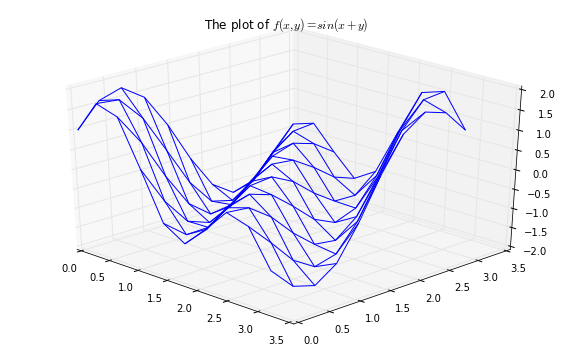

In [123]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')

ax.plot_wireframe(mesh_x, mesh_y, values_3D)
ax.view_init(azim=-45, elev=30)


plt.title('The plot of $f(x, y) = sin(x+y)$')

In [63]:
import scipy.sparse as sp

In [109]:
def numpy_three_diagonal(N):
    main_diagonal = -2 * np.eye(N)
    subdiag = np.ones(N-2)
    lower_subdiag = np.diag(subdiag,-2)
    upper_subdiag = np.diag(subdiag,2)
    result = main_diagonal + lower_subdiag + upper_subdiag
    
    return result

numpy_three_diagonal(6)

array([[-2.,  0.,  1.,  0.,  0.,  0.],
       [ 0., -2.,  0.,  1.,  0.,  0.],
       [ 1.,  0., -2.,  0.,  1.,  0.],
       [ 0.,  1.,  0., -2.,  0.,  1.],
       [ 0.,  0.,  1.,  0., -2.,  0.],
       [ 0.,  0.,  0.,  1.,  0., -2.]])

In [111]:
def scipy_three_diagonal(N):
    main_diagonal = -2 * np.ones(N) 
    diag1 = np.ones(N-2) 
    diag2 = np.ones(N-2)
    diagonals = [main_diagonal,diag1,diag2]
    offsets = [0,-2,2]
    result = sp.diags(diagonals,offsets,(N,N),format = 'coo')

    return result
my_matrix = scipy_three_diagonal(6)

In [112]:
print my_matrix

  (0, 0)	-2.0
  (1, 1)	-2.0
  (2, 2)	-2.0
  (3, 3)	-2.0
  (4, 4)	-2.0
  (5, 5)	-2.0
  (2, 0)	1.0
  (3, 1)	1.0
  (4, 2)	1.0
  (5, 3)	1.0
  (0, 2)	1.0
  (1, 3)	1.0
  (2, 4)	1.0
  (3, 5)	1.0


In [98]:
from scipy.linalg import toeplitz, hankel

In [103]:
hankel(xrange(4), [__, 0, -3, -4,0])

array([[0, 1, 2, 3, 0],
       [1, 2, 3, 0, -3],
       [2, 3, 0, -3, -4],
       [3, 0, -3, -4, 0]], dtype=object)

In [114]:
def three_diagonal(N):
    A = np.zeros((N, N), dtype=np.int)
    for i in range(N):
        A[i, i] = -2
        if i > 1:
            A[i, i-2] = 1
        if i < N-2:
            A[i, i+2] = 1
    return A

print three_diagonal(5)

[[-2  0  1  0  0]
 [ 0 -2  0  1  0]
 [ 1  0 -2  0  1]
 [ 0  1  0 -2  0]
 [ 0  0  1  0 -2]]


In [116]:
from timeit import default_timer as timer

In [117]:
dims = [300, 1000, 3000, 10000]
bench_names = ['loop', 'numpy', 'scipy']
timings = {bench:[] for bench in bench_names}

for n in dims:
    start_time = timer()
    calc = three_diagonal(n)
    time_delta = timer() - start_time
    timings['loop'].append(time_delta)
    
    start_time = timer()
    calc = numpy_three_diagonal(n)
    time_delta = timer() - start_time
    timings['numpy'].append(time_delta)
    
    start_time = timer()
    calc = scipy_three_diagonal(n)
    time_delta = timer() - start_time
    timings['scipy'].append(time_delta)

In [125]:
dims = [300, 1000, 3000, 10000]
bench_names = ['loop', 'numpy', 'scipy']
timings = {bench_name: [] for bench_name in bench_names}

def timing_machine(func, *args, **kwargs):
    start_time = timer()
    result = func(*args, **kwargs)
    time_delta = timer() - start_time
    return time_delta

for n in dims:
    timings['loop'].append(timing_machine(three_diagonal, n))
    timings['numpy'].append(timing_machine(numpy_three_diagonal, n))
    timings['scipy'].append(timing_machine(scipy_three_diagonal, n))

In [127]:
dims = [300, 1000, 3000, 10000]
bench_names = ['loop', 'numpy', 'scipy']
bench_funcs = [three_diagonal, numpy_three_diagonal, scipy_three_diagonal]
timings_best = {bench_name: [] for bench_name in bench_names}

for bench_name, bench_func in zip(bench_names, bench_funcs):
    print '\nMeasuring {}'.format(bench_func.func_name)
    for n in dims:
        print n,
        time_result = %timeit -q -o bench_func(n)
        timings_best[bench_name].append(time_result.best)


Measuring three_diagonal
300 1000 3000 10000 
Measuring numpy_three_diagonal
300 1000 3000 10000 
Measuring scipy_three_diagonal
300 1000 3000 10000


In [128]:
timings_best

{'loop': [0.00028693469000245386,
  0.0016744824527850143,
  0.005287442825156177,
  0.020539323887715],
 'numpy': [0.001605019605547568,
  0.02522925749890419,
  0.2268180652827141,
  2.682857059267917],
 'scipy': [0.0003082779068226955,
  0.000377802346198223,
  0.0005366119086866092,
  0.00106172456456261]}

In [129]:
import matplotlib.pyplot as plt
%matplotlib inline 

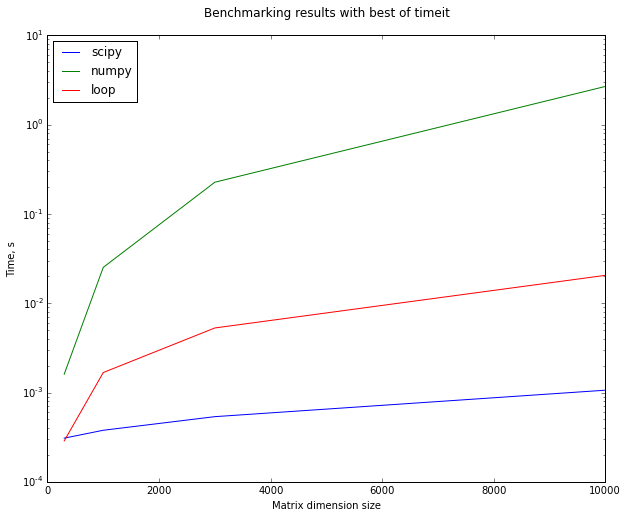

In [131]:
plt.figure(figsize=(10,8))

for bench_name, values in timings_best.iteritems():
    plt.semilogy(dims, values, label=bench_name)
    
plt.legend(loc='best')
plt.title('Benchmarking results with best of timeit', y=1.03)
plt.xlabel('Matrix dimension size')
plt.ylabel('Time, s')

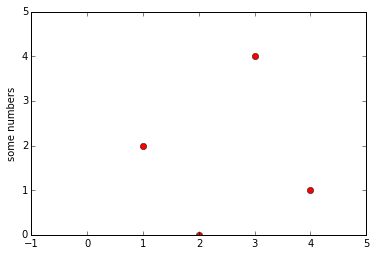

In [136]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4],[2,0,4,1],'ro')
plt.axis([-1,5,0,5])
plt.ylabel('some numbers')
plt.show()

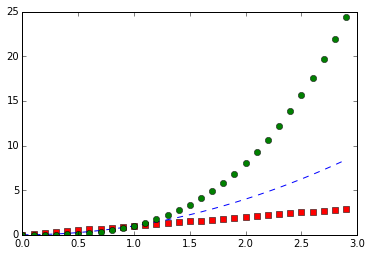

In [147]:
t = np.arange(0.,3.,0.1)
plt.plot(t,t,'rs',t,t*t,'b--',t,t**3,'go')

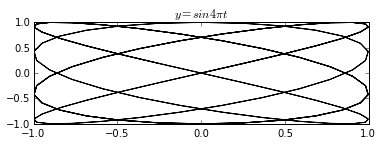

In [166]:
def x(t):
    return np.sin(4*np.pi*t)

def y(t):
    return np.sin(3*np.pi*t)

t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(x(t2),y(t2), 'k')
plt.title(r'$y= sin 4 \pi t$')


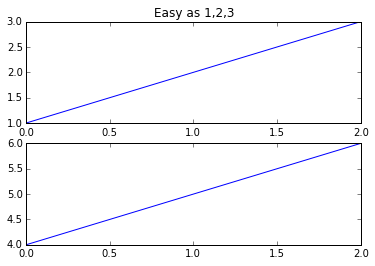

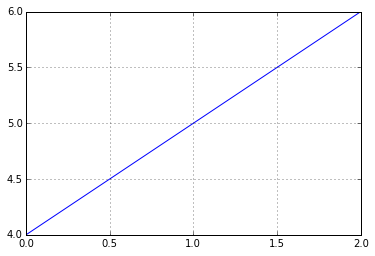

In [152]:
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1,2,3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4,5,6])


plt.figure(2)                # a second figure
plt.plot([4,5,6]) 
plt.grid(True)
                            # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1,2,3')   # subplot 211 title

In [2]:
import numpy as np
n = 100
a = np.random.randn(n, n) #Random n x n matrix
s1 = np.linalg.norm(a, 2) #Spectral
s2 = np.linalg.norm(a, 'fro') #Frobenius
s3 = np.linalg.norm(a, 1) #1-norm
s4 = np.linalg.norm(a, np.inf) #It was trick to find the infinity
print 'Spectral:', s1, 'Frobenius:', s2, '1-norm', s3, 'infinity', s4

Spectral: 19.4800579101 Frobenius: 99.5761366539 1-norm 93.0966403627 infinity 91.2650216545
